# Q-Learning

This code is part of a Q-learning implementation, a reinforcement learning technique, where an agent learns to make decisions (take actions) in an environment to maximize a cumulative reward. The Q-table is a data structure used to store Q-values, which represent the expected cumulative rewards for taking a particular action in a specific state.

In [1]:
import numpy as np
import random 
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Q(st, sa) + alpha [rt+1 + epsilon max Q(st+1, a) - Q(st-at)]
# step t, agent st, agent moves: st+1, action: at

# Initialization of Q_Table 

The q_table is initialized as a 2D NumPy array with dimensions (state_size, action_size). Initially, all Q-values are set to zero.

In [3]:
# Q-table s x a = 6 x 2
state_size = 6
action_size = 2
move_cost = 0.01

# Q-table aand values initialized to zero
q_table = np.zeros((state_size,action_size))
print(q_table)


[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


# Q_learning 6x2 table

alpha: The learning rate determines how much the Q-values are updated during each iteration.

epsilon: The exploration-exploitation trade-off factor. It decides whether the agent should explore new actions or exploit the current best-known action.

gamma: The discount rate, which balances immediate and future rewards.

The outer loop (while j < max_episodes) represents multiple episodes of the agent interacting with the environment.

The inner loop (while i < maxIteration) represents a single episode, during which the agent takes actions and updates its Q-values.

The agent randomly chooses an action (rnd) and transitions to a new state (new_state).

Q-values are updated based on the Bellman equation, incorporating the immediate reward and the discounted maximum Q-value of the next state.

In [4]:
alpha = 0.1 #learning rate
epsilon = 1 #discount factor
gamma = 0.8 #discount rate

reward = [-1, 0, 0, 0, 0, +1]

#external loop, the following is just an episode, make a loop for more episodes here
max_episodes = 100
j=0

while j < max_episodes:
  state = 2
  maxIteration=100
  i = 0
  j = j+1
  while i < maxIteration:
    if(state==0 or state==5):
      break
    #randomly choose an action - left:0 - right:1 -
    rnd = random.randint(0, 1)
    if rnd == 0:
      new_state = state -1
    else:
      new_state = state +1
    i = i+1

  # update Qtable
    q_table[state, rnd] = q_table[state, rnd] + alpha * ((reward[new_state]-move_cost + gamma * max(q_table[new_state] - q_table[state, rnd])))
    state=new_state
print(q_table)

[[ 0.          0.        ]
 [-1.25247867  0.82323   ]
 [ 0.69432553  1.10284731]
 [ 1.00024899  1.15079364]
 [ 0.98078223  1.20020643]
 [ 0.          0.        ]]


# Q-Learning with Greedy Algorithm
The greedy function determines the action to take at a given state based on the Q-values. It returns 0 if the Q-value for the "left" action is greater, and 1 if the Q-value for the "right" action is greater.



In [5]:
#greedy algorithm 

alpha =0.3 # the learning rate, 0 agent learns nothing, 1 learns recent information
gamma = 0.8 # the discount factor, determines of future rewards

maxEpisode = 100
cost = 0.1
reward=[-1,0,0,0,0,+1]
maxIteration = 100
maxEpisode = 100

Q_table = np.zeros((6,2))

def greedy(array, state): 
  if array[state, 0] > array[state,1] :
    return 0
  else:
    return 1
  
j = 0
while j < maxEpisode:
  epsilon = 1
  state = 2
  j = j+1
  i=0

  while i < maxIteration: # 0 < 100    
    r = np.random.uniform(0,1)    
    i= i+1
    
    if (state == 0 or state == 5): 
      break
      
    if r < epsilon: #Exploration
      action = np.random.randint(0,2)
          
    elif r>=epsilon : # Exploitation
      action=greedy(Q_table, state)
    
    if action == 0:
      #print('right')
      new_state = state + 1
    elif action == 1: 
      #print('left')
      new_state = state - 1 
    epsilon -=0.01

    Q_table[state,  action] = Q_table[state, action] + alpha * ((reward[new_state]-cost + gamma * max(Q_table[new_state] - Q_table[state, action])))
    state=new_state

print(Q_table)

[[ 0.          0.        ]
 [ 0.74881251 -1.37499998]
 [ 0.87454213  0.62326483]
 [ 0.99966047  0.74885892]
 [ 1.12490027  0.83616615]
 [ 0.          0.        ]]


# Updated Q-learning with Epsilon Decay for Epsilon-Greedy

In [6]:


# Q-table s x a = 6 x 2
state_size = 6
action_size = 2
move_cost = 0.01

# Q-table and values initialized to zero
q_table = np.zeros((state_size, action_size))

alpha = 0.1  # learning rate
epsilon = 1.0  # exploration-exploitation trade-off
gamma = 0.8  # discount rate

reward = [-1, 0, 0, 0, 0, +1]

# external loop, the following is just an episode, make a loop for more episodes here
max_episodes = 100
j = 0

while j < max_episodes:
    epsilon *= 0.995  # Decay epsilon
    state = 2
    max_iteration = 100
    i = 0
    j += 1

    while i < max_iteration:
        if state == 0 or state == 5:
            break

        # randomly choose an action - left:0 - right:1 -
        rnd = np.random.randint(0, 2)
        new_state = state - 1 if rnd == 0 else state + 1
        i += 1

        # update Q-table
        target = reward[new_state] - move_cost + gamma * np.max(q_table[new_state])
        q_update = alpha * (target - q_table[state, rnd])
        q_table[state, rnd] += q_update

        state = new_state

print(q_table)


[[ 0.          0.        ]
 [-1.00692631  0.42963014]
 [ 0.32346289  0.59673947]
 [ 0.45465008  0.76660028]
 [ 0.55260566  0.98135932]
 [ 0.          0.        ]]


In [7]:
# Large Q-learning

In [8]:
# 2D grid
# Q-table s x a = 3x4 x 4
n_rows=3
n_cols = 4
action_size = 4
move_cost = 0.04

# Q-table aand values initialized to zero
q2_table = np.zeros((12,action_size))
print(q2_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [9]:
alpha = 0.5 #learning rate
epsilon = 1
gamma = 0.7 #discount rate
move_cost = 0.04

reward = [(0, 0, 0, +1),
          (0, 0 , 0, -1),
          (0, 0, 0, 0)]

n_rows = len(reward)
n_cols = len(reward[0])

#start position
start_pos = (2,0)
win_pos = (0,3)
lose_pos = (1,3)

#randomly choose an action - left:0 - right:1 - up: 2 - down:3 -

maxEpisodes=100
maxIteration=100
f=0
while f < maxEpisodes:
  #restart from start position
  pos=start_pos
  e=0
  f=f+1
  while e < maxIteration:
    if(pos==win_pos or pos==lose_pos):
      break 
    move = random.randint(0, 3)
    #check if it can move in the direction or not
    if (pos[1]>0 and move==0): #left
      new_pos = (pos[0], pos[1]-1)
    elif (pos[1]<3 and move==1): #right
      new_pos = (pos[0], pos[1]+1)
    elif (pos[0]>0 and move==2): #up
      new_pos = (pos[0]-1, pos[1])
    elif (pos[0]<2 and move==3): #down
      new_pos = (pos[0]+1, pos[1])
    else: #estremo
      continue 
    if new_pos==(1,1): # if it goes into the black box, dont update pos but choose another move
      continue
    e = e+1

    # update Qtable
    state = pos[0]*n_cols+pos[1]
    new_state = new_pos[0]*n_cols+new_pos[1]
    q2_table[state, move] = q2_table[state, move] + alpha * ((reward[new_pos[0]][new_pos[1]]-move_cost + gamma * max(q2_table[new_state] - q2_table[state, move])))
    pos=new_pos

print(q2_table)

[[ 0.          1.25714111  0.          1.1428534 ]
 [ 1.19999523  1.31428488  0.          0.        ]
 [ 1.25712856  1.37142818  0.          1.25712558]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          1.19999733  1.08571047]
 [ 0.          0.          0.          0.        ]
 [ 0.         -1.48571411  1.31428056  1.19979453]
 [ 0.          0.          0.          0.        ]
 [ 0.          1.14284363  1.14285391  0.        ]
 [ 1.08570819  1.1999901   0.          0.        ]
 [ 1.1428411   1.14277497  1.25713439  0.        ]
 [ 1.19994983  0.         -1.48570571  0.        ]]


# Large Updated Q-Learning with Greedy Algorithm

In [10]:


alpha = 0.5  # Learning rate
epsilon = 1.0
gamma = 0.7  # Discount rate
move_cost = 0.04

# Define rewards as a NumPy array
reward = np.array([
    [0, 0, 0, +1],
    [0, 0, 0, -1],
    [0, 0, 0, 0]
])

n_rows, n_cols = reward.shape

# Define positions using tuples
start_pos = (2, 0)
win_pos = (0, 3)
lose_pos = (1, 3)

# Initialize Q-table with zeros
q2_table = np.zeros((n_rows * n_cols, 4))

max_episodes = 100
max_iteration = 100

f = 0
while f < max_episodes:
    # Restart from start position
    pos = start_pos
    e = 0
    f += 1

    while e < max_iteration:
        if pos == win_pos or pos == lose_pos:
            break

        # Randomly choose an action - left: 0 - right: 1 - up: 2 - down: 3
        move = np.random.randint(0, 4)

        # Check if it can move in the direction or not
        if pos[1] > 0 and move == 0:  # left
            new_pos = (pos[0], pos[1] - 1)
        elif pos[1] < n_cols - 1 and move == 1:  # right
            new_pos = (pos[0], pos[1] + 1)
        elif pos[0] > 0 and move == 2:  # up
            new_pos = (pos[0] - 1, pos[1])
        elif pos[0] < n_rows - 1 and move == 3:  # down
            new_pos = (pos[0] + 1, pos[1])
        else:  # Estremo
            continue

        if new_pos == (1, 1):  # If it goes into the black box, don't update pos but choose another move
            continue

        e += 1

        # Update Q-table
        state = pos[0] * n_cols + pos[1]
        new_state = new_pos[0] * n_cols + new_pos[1]
        q2_table[state, move] = q2_table[state, move] + alpha * (
                (reward[new_pos[0], new_pos[1]] - move_cost + gamma * np.max(q2_table[new_state]) -
                 q2_table[state, move]))
        pos = new_pos

print(q2_table)


[[ 0.          0.4024      0.          0.129176  ]
 [ 0.24168     0.632       0.          0.        ]
 [ 0.4024      0.96        0.          0.40236686]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.24168     0.0504232 ]
 [ 0.          0.          0.          0.        ]
 [ 0.         -1.04        0.63199963  0.2416739 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.1291745   0.129176    0.        ]
 [ 0.0504232   0.24167921  0.          0.        ]
 [ 0.12917323  0.12917303  0.40239929  0.        ]
 [ 0.24167784  0.         -1.04        0.        ]]


In [11]:
# Extra - Large Complex Frozen Lake 

(0, 9)
[(8, 11), (8, 9), (1, 4)]


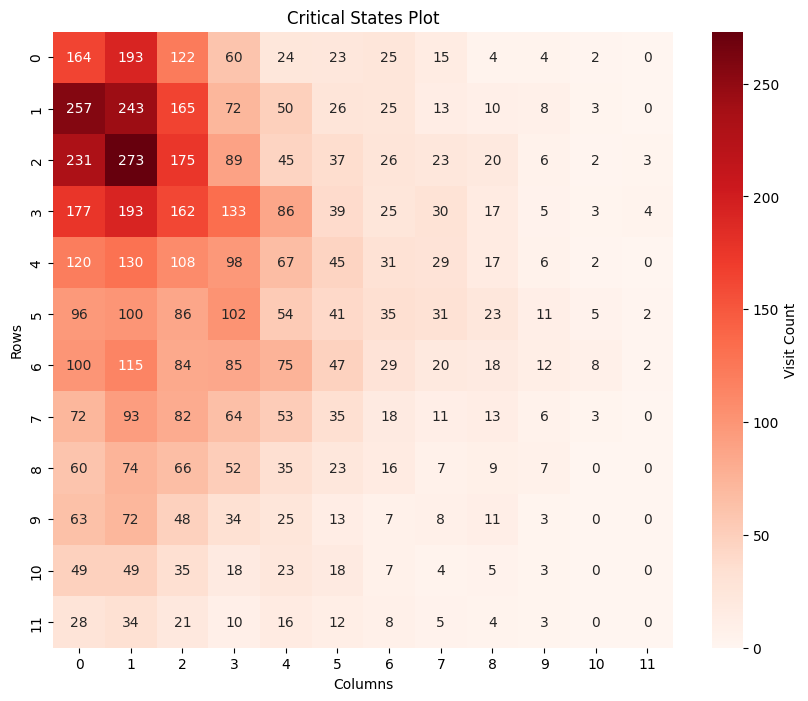

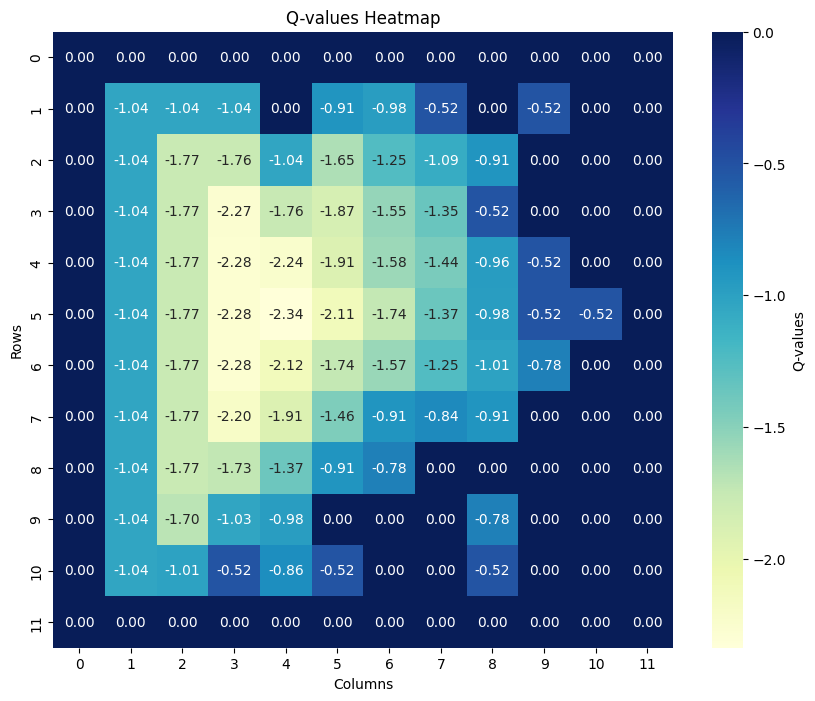

[[ 0.         -1.04        0.         -1.04      ]
 [-1.04       -1.04        0.         -1.768     ]
 [-1.04       -1.04        0.         -1.768     ]
 [-1.03999901 -1.03999603  0.         -1.76787027]
 [-1.02375    -1.03974609  0.         -1.02375   ]
 [-1.02375    -1.031875    0.         -1.64896875]
 [-1.0359375  -1.03796875  0.         -1.612     ]
 [-1.031875   -0.975       0.         -0.975     ]
 [-0.91        0.          0.         -0.52      ]
 [ 0.          0.          0.          0.        ]
 [-0.52        0.          0.         -0.52      ]
 [ 0.          0.          0.          0.        ]
 [ 0.         -1.768      -1.04       -1.04      ]
 [-1.04       -1.768      -1.04       -1.768     ]
 [-1.768      -1.76799879 -1.04       -2.2776    ]
 [-1.76798061 -1.03999901 -1.03999975 -2.2673508 ]
 [ 0.          0.          0.          0.        ]
 [-1.031875   -1.68634375 -0.91       -1.8724875 ]
 [-1.40725    -0.975      -1.03949219 -1.547     ]
 [-1.4105     -0.52       -0.91

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Define rewards as a NumPy array for a 12x12 lake
n_rows, n_cols = 12, 12

# Create a reward matrix with 50 -1 spaces and 50 +1 spaces, the rest are zeros
reward = np.zeros((n_rows, n_cols))
reward[:50, :] = -1
reward[50:, :] = +1

# Define positions using tuples
start_pos = (2, 0)


win_positions = [(0, i) for i in range(8, 12)]
lose_positions = [(1, i) for i in range(3, 6)] + [(8, i) for i in range(9, 12)]

# Randomly select one win position and multiple lose positions
win_pos = random.choice(win_positions)
print(win_pos)

# Set the number of lose positions
num_lose_positions = 3  
lose_pos = random.sample(lose_positions, k=num_lose_positions)
print(lose_pos)

# Initialize Q-table with zeros
q2_table = np.zeros((n_rows * n_cols, 4))

alpha = 0.5  # Learning rate
epsilon = 1.0
gamma = 0.7  # Discount rate
move_cost = 0.04

max_episodes = 100
max_iteration = 100

# Additional variables for critical states plot
critical_states = np.zeros((n_rows, n_cols))

f = 0
while f < max_episodes:
    # Restart from start position
    pos = start_pos
    e = 0
    f += 1

    while e < max_iteration:
        if pos == win_pos or pos in lose_pos:
            break

        # Randomly choose an action - left: 0 - right: 1 - up: 2 - down: 3
        move = np.random.randint(0, 4)

        # Check if it can move in the direction or not
        if pos[1] > 0 and move == 0:  # left
            new_pos = (pos[0], pos[1] - 1)
        elif pos[1] < n_cols - 1 and move == 1:  # right
            new_pos = (pos[0], pos[1] + 1)
        elif pos[0] > 0 and move == 2:  # up
            new_pos = (pos[0] - 1, pos[1])
        elif pos[0] < n_rows - 1 and move == 3:  # down
            new_pos = (pos[0] + 1, pos[1])
        else:  # Estremo
            continue

        if new_pos == (1, 11):  # If it goes into the black box, don't update pos but choose another move
            continue

        e += 1

        # Update Q-table
        state = pos[0] * n_cols + pos[1]
        new_state = new_pos[0] * n_cols + new_pos[1]
        q2_table[state, move] = q2_table[state, move] + alpha * (
                (reward[new_pos[0], new_pos[1]] - move_cost + gamma * np.max(q2_table[new_state]) -
                 q2_table[state, move]))
        pos = new_pos

        # Update critical states count
        critical_states[pos[0], pos[1]] += 1

# Plot Convergence
#plt.figure(figsize=(10, 10))
#plt.plot(episode_rewards, linestyle='-')
#plt.title("Convergence Plot")
#plt.xlabel("Episodes")
#plt.ylabel("Total Reward")
#plt.show() # Way too much information to show


# Plot Critical States
plt.figure(figsize=(10, 8))
sns.heatmap(critical_states, annot=True, fmt=".0f", cmap="Reds", cbar_kws={'label': 'Visit Count'})
plt.title("Critical States Plot")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# Reshape Q-table for visualization
q_values = np.max(q2_table, axis=1).reshape(n_rows, n_cols)

# Plotting the Q-values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(q_values, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Q-values'})
plt.title("Q-values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# Print Q-table
print(q2_table)
